# Modèle de reconnaissance d'empreintes

In [271]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from keras import layers
from random import shuffle

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [272]:
# |---------------------------------------------|
# |          Configuration du modèle            |
# |---------------------------------------------|

batch_size = 32
epochs = 37

In [273]:
# Construire le dataset à partir du folder 

image_size = (256, 256)

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/home/shared/Dataset_wildlens",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 508 files belonging to 2 classes.
Using 407 files for training.
Using 101 files for validation.


In [274]:
# Voir les 9 premières images

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(np.array(images[i]).astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.axis("off")

In [275]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.4),
    layers.RandomFlip("vertical")
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(np.array(augmented_images[0]).astype("uint8"))
#         plt.axis("off")


In [276]:
binary_model = tf.keras.Sequential([
    layers.Resizing(256, 256),

    layers.Conv2D(32, kernel_size=6, activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(128, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(256, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Flatten(),
    layers.Dropout(0.5),  # Régularisation

    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sortie binaire
])

In [277]:
binary_model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [278]:
binary_model.build()
binary_model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_24 (Resizing)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_98 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [279]:
hist=binary_model.fit(
   train_ds,
   epochs=epochs,
   batch_size=batch_size,
   validation_data=val_ds
)

Epoch 1/37
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.4965 - loss: 22.8647 - val_accuracy: 0.4950 - val_loss: 0.7735
Epoch 2/37
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5094 - loss: 0.8579 - val_accuracy: 0.4950 - val_loss: 0.6931
Epoch 3/37
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5031 - loss: 0.6908 - val_accuracy: 0.4950 - val_loss: 0.6931
Epoch 4/37
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5086 - loss: 0.6883 - val_accuracy: 0.4950 - val_loss: 0.6911
Epoch 5/37
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5207 - loss: 0.6793 - val_accuracy: 0.7129 - val_loss: 0.6232
Epoch 6/37
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6491 - loss: 0.6515 - val_accuracy: 0.7129 - val_loss: 0.5499
Epoch 7/37
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6839 - loss: 0.5879 - val_accuracy: 0.7030 - val_loss: 0.5524
Epoch 8/37
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7333 - loss: 0.5257 - val_accuracy: 0.7921 - 

In [280]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

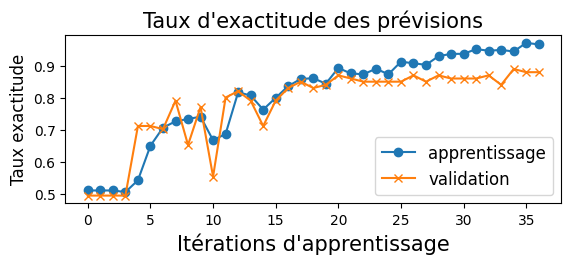

In [281]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'],'o-')
plt.plot(hist.history['val_accuracy'],'x-')
plt.title("Taux d'exactitude des prévisions",fontsize=15)
plt.ylabel('Taux exactitude',fontsize=12)
plt.xlabel("Itérations d'apprentissage",fontsize=15)
plt.legend(['apprentissage', 'validation'], loc='lower right',fontsize=12)

In [282]:
binary_model.predict

<bound method TensorFlowTrainer.predict of <Sequential name=sequential_24, built=True>>

Faire :
- Un rollback + save best histoire de sauvegarder la meilleure version du modèle
- Un predict + matrice de confusion
